In [11]:
import loica as lc
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# node_1 = lc.Strain()

In [8]:
# create genetic network that will be within the first strain
c4_to_scb2 = lc.GeneticNetwork()

# add regulators
c4_reg = lc.Regulator(name='C4', degradation_rate=1)
scb2_reg = lc.Regulator(name='SCB2', degradation_rate=1)
laci_reg = lc.Regulator(name='LacI', degradation_rate=1)

c4_to_scb2.add_regulator([c4_reg, scb2_reg, laci_reg])

# add reporters
mcherry_rep = lc.Reporter(name='mCherry', degradation_rate=1, color='red')
c4_to_scb2.add_reporter(mcherry_rep)

# add operators
c4_laci = lc.Hill1(name='Prhl', input=c4_reg, output=laci_reg, alpha=[0.1, 10000], K=10, n=2)
laci_not_scb2 = lc.Hill1(name='Plac', input=laci_reg, output=[scb2_reg, mcherry_rep], alpha=[10000,0.1], K=10, n=2)

c4_to_scb2.add_operator([c4_laci, laci_not_scb2])

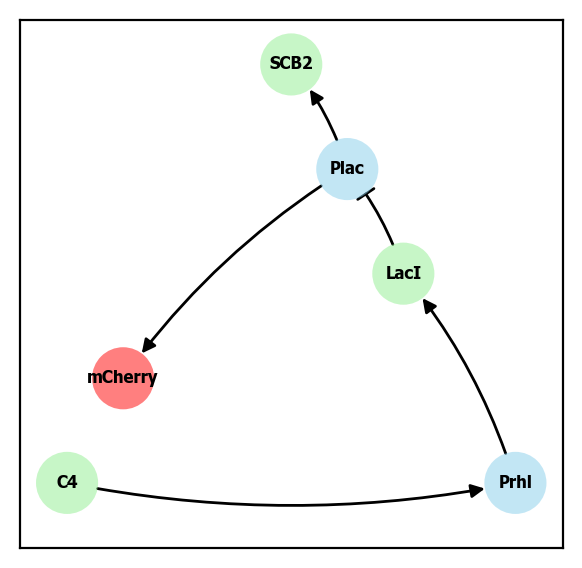

In [13]:
plt.figure(figsize=(3.5,3.5), dpi=200)
c4_to_scb2.draw(pos=nx.planar_layout)

In [ ]:
# add "wires" - diffusible molecules that will act as signals between strains
# node_1.add_wire([c4_reg, scb2_reg])
# create consortium
# repr_cons = lc.Consortium(strains=[node_1, node_2, node_3])